In [5]:
# importing all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt 
import numpy.polynomial.legendre as leg #for finding the legendre nodes
import numpy.linalg as lin

In [122]:
# defining all the functions required for interpolation

def runge(x):  # function takes the values of x and returns an array comprising the values of the runge function at those x
    return [1/(1+25*a**2) for a in x]

def runge_noise(x):  #runge function but with added noise courtesy of np.random
    return [1/(1+25*a**2) + 10e-5*np.random.random() for a in x]
    

def chebyshev_nodes(n): #function takes input n and returns the chebyshev nodes for the n^th order chebyshev polynomial
    a = np.array(range(n))
    return np.cos(((2*a+1)/(2*n+2))*np.pi)

#function takes the nodes,datapoints and integer i and returns the lagrange polynomial li(x) evaluated at those datapoints
def compute_lag(x_nodes,x,i): 
    M = len(x)
    N = len(x_nodes)
    y = np.ones(M)
    ones = np.ones(M)
    for j in range(N):
        if(j!=i):
            y = np.multiply((x-x_nodes[j])*ones/(x_nodes[i]-x_nodes[j]),y) #performs an element wise product
    return y
#function takes the function values at the nodes, nodes and datapoints and evaluates the lagrange interpolant at those datapoints
def interp_runge(f_nodes,x_nodes,x): #function to calculate interpolant
    M = len(x)
    N = len(x_nodes)
    f = np.zeros(M)
    for i in range(N):
        f += f_nodes[i]*compute_lag(x_nodes,x,i)
    
    return f
        
#function returns the maximum relative error between the interpolant and the function  
def max_rel_error(f_true,f_interp): # function to find the maximum error between the interpolant and true function
    return max(np.abs((f_true-f_interp)/f_true))
    
# this function implements the linear system approach of finding the interpolant    
def least_squares(x,x_2,f): # function to find the least squares interpolation
    #finding vandermonde matrix
    X = np.vander(x,increasing = True) #function generates the vandermonde matrix
    Q,R = lin.qr(X) #QR decomposition of x, computationally efficient method
    #assuming R is full rank
    b = np.dot(np.transpose(Q),f) 
    a = lin.solve(R,b) #solves using LU decomposition, a backward stable algorithm
    X = np.vander(x_2,len(x),increasing = True)
    f_ls = np.dot(X,a) #finds the value of the interpolant at all the required locations
        
    return f_ls
    
    

    

Roots of the legendre polynomials for 5  nodes [-9.06179846e-01 -5.38469310e-01  5.55430416e-17  5.38469310e-01
  9.06179846e-01]
Roots of the legendre polynomials for 7  nodes [-9.49107912e-01 -7.41531186e-01 -4.05845151e-01 -1.33565131e-16
  4.05845151e-01  7.41531186e-01  9.49107912e-01]
Roots of the legendre polynomials for 9  nodes [-9.68160240e-01 -8.36031107e-01 -6.13371433e-01 -3.24253423e-01
  1.19112537e-16  3.24253423e-01  6.13371433e-01  8.36031107e-01
  9.68160240e-01]
Roots of the legendre polynomials for 11  nodes [-9.78228658e-01 -8.87062600e-01 -7.30152006e-01 -5.19096129e-01
 -2.69543156e-01  1.18073016e-16  2.69543156e-01  5.19096129e-01
  7.30152006e-01  8.87062600e-01  9.78228658e-01]


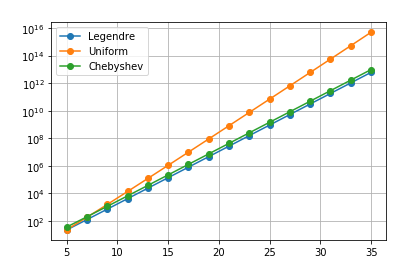

Starting condition numbers: legendre_nodes:22.704,uniform_nodes:23.531,chebyshev_nodes:36.837
Ending condition numbers: legendre_nodes:6.141e+12,uniform_nodes:4.994e+15,chebyshev_nodes:9.778e+12


In [125]:
n_start = 5
n_step = 2
n_stop = 36 #value we want to stop at +1
n_val = []
v_u = [] #lists that hold the condition number of the vandermonde matrix
v_l = []
v_c = []
for n in range(n_start,n_stop,n_step):
    x_uniform = np.linspace(-1,1,n,endpoint = True)
    x_legendre = np.zeros(n+1)
    x_legendre[-1] = 1
    x_legendre = leg.legroots(x_legendre) #computes the roots of the legendre polynomial of order n
    if(n < 12):
        print("Roots of the legendre polynomials for",n," nodes",x_legendre)
    
    x_chebyshev = np.zeros(n)
    x_chebyshev = chebyshev_nodes(n)
    V = np.vander(x_uniform,n,increasing = True)
    v_u.append(lin.cond(V)) #function computes the condition number of the matrix V
    V = np.vander(x_legendre,n,increasing = True)
    v_l.append(lin.cond(V))
    V = np.vander(x_chebyshev,n,increasing = True)
    v_c.append(lin.cond(V))
    n_val.append(n)
    
 
#plot the condition numbers in a semilog fashion
plt.semilogy(n_val,v_l,'o-',label = 'Legendre')
plt.semilogy(n_val,v_u,'o-',label = 'Uniform')
plt.semilogy(n_val,v_c,'o-',label = 'Chebyshev')
plt.grid()
plt.legend()
plt.title("Condition Number of Vandermonde matrix", color = "white")
plt.xlabel("N ->",color = "white")
plt.ylabel("log(cond(V))", color = "white")
plt.show()

print("Starting condition numbers: legendre_nodes:{:.3f},uniform_nodes:{:.3f},chebyshev_nodes:{:.3f}".format(v_l[0],v_u[0],v_c[0]))
print("Ending condition numbers: legendre_nodes:{:.3e},uniform_nodes:{:.3e},chebyshev_nodes:{:.3e}".format(v_l[-1],v_u[-1],v_c[-1]))

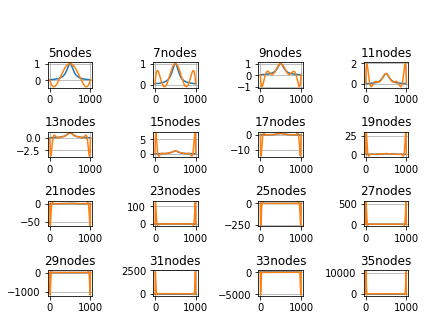

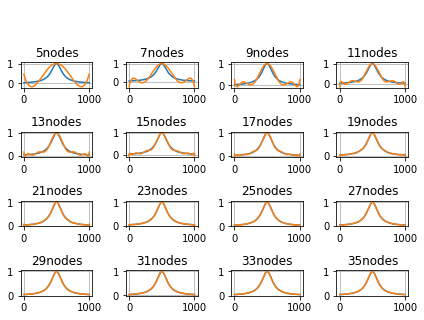

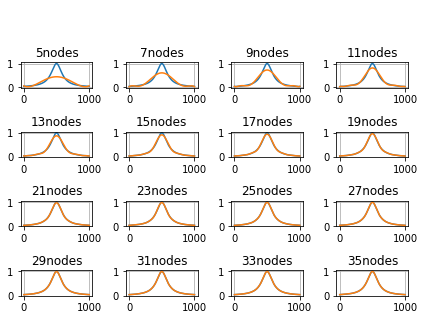

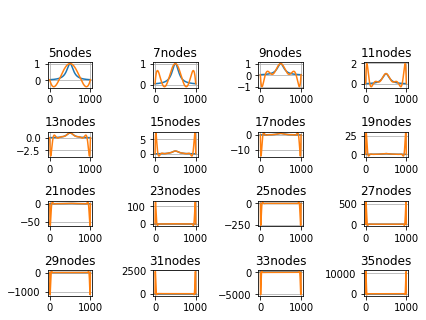

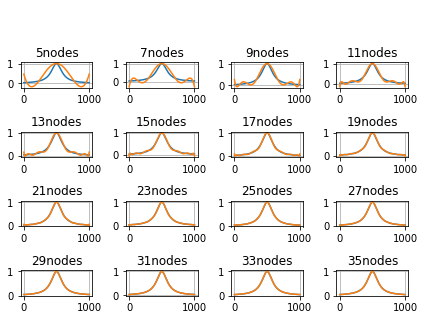

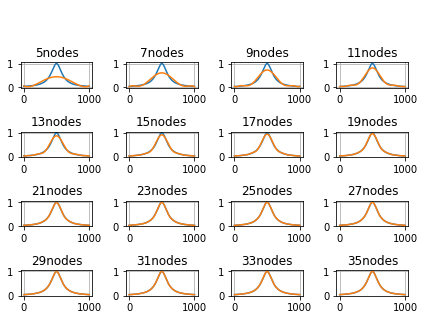

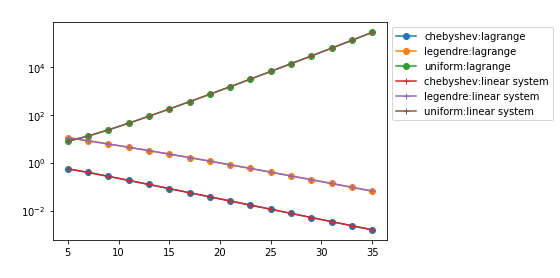

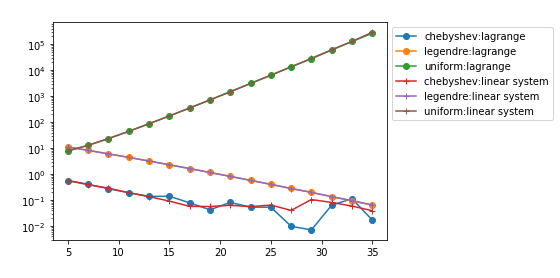

0.000,-0.000,0.000
-3.159e-05,-6.276e+03,1.989e-05


In [123]:
n_start = 5
n_step = 2
n_stop = 36 #value we want to stop at +1
M = 1001

x = np.linspace(-1,1,M,endpoint = True)
f_true = runge(x)
f_err_u = []
f_err_nu = []
k = 1
for n in range(n_start,n_stop,n_step):
    x_uniform = np.linspace(-1,1,n,endpoint = True)
    f_uniform = runge(x_uniform)
    f_int = interp_runge(f_uniform,x_uniform,x)
    f_err_u.append(max_rel_error(f_true,f_int))
    f_uniform_1 = runge_noise(x_uniform)
    f_int_1 = interp_runge(f_uniform_1,x_uniform,x)
    f_err_nu.append(max_rel_error(f_true,f_int_1))
    plt.subplot(4,4,k)
    k += 1
    plt.plot(f_true)
    plt.grid()
    plt.plot(f_int)
    plt.title(str(n)+"nodes")

plt.suptitle("Uniform Nodes:Lagrange",x = 0.5,y=1.1,color = "white")
plt.tight_layout()
plt.show()

f_err_l = []
f_err_nl = []
k = 1
for n in range(n_start,n_stop,n_step):
    x_legendre = np.zeros(n+1)
    x_legendre[-1] = 1
    x_legendre = leg.legroots(x_legendre)
    f_legendre = runge(x_legendre)
    f_int = interp_runge(f_legendre,x_legendre,x)
    f_err_l.append(max_rel_error(f_true,f_int))
    
    f_legendre_1 = runge_noise(x_legendre)
    f_int_1 = interp_runge(f_legendre_1,x_legendre,x)
    f_err_nl.append(max_rel_error(f_true,f_int_1))
    
    plt.subplot(4,4,k)
    k += 1
    plt.plot(f_true)
    plt.grid()
    plt.plot(f_int)
    plt.title(str(n)+"nodes")

plt.suptitle("Legendre Nodes:Lagrange",x = 0.5,y=1.1,color = "white")
plt.tight_layout()
plt.show()

f_err_c = []
f_err_nc = []
k = 1
for n in range(n_start,n_stop,n_step):
    x_chebyshev = np.zeros(n)
    x_chebyshev = chebyshev_nodes(n)
    f_chebyshev = runge(x_chebyshev)
    f_int = interp_runge(f_chebyshev,x_chebyshev,x)
    f_err_c.append(max_rel_error(f_true,f_int))
    
    f_chebyshev_1 = runge_noise(x_chebyshev)
    f_int_1 = interp_runge(f_chebyshev_1,x_chebyshev,x)
    f_err_nc.append(max_rel_error(f_true,f_int_1))
    
    plt.subplot(4,4,k)
    k += 1
    plt.plot(f_true)
    plt.grid()
    plt.plot(f_int)
    plt.title(str(n)+"nodes")

plt.suptitle("Chebyshev Nodes:Lagrange",x = 0.5,y=1.1,color = "white")
plt.tight_layout()
plt.show()

f_err_ul = []
f_err_nul = []
k = 1
for n in range(n_start,n_stop,n_step):
    x_uniform = np.linspace(-1,1,n,endpoint = True)
    f_uniform = runge(x_uniform)
    f_int = least_squares(x_uniform,x,f_uniform)
    #f_int = np.interp(x,x_uniform,f_uniform)
    f_err_ul.append(max_rel_error(f_true,f_int))
    
    f_uniform_1 = runge_noise(x_uniform)
    f_int_1 = least_squares(x_uniform,x,f_uniform_1)
    f_err_nul.append(max_rel_error(f_true,f_int_1))
    
    plt.subplot(4,4,k)
    k += 1
    plt.plot(f_true)
    plt.grid()
    plt.plot(f_int)
    plt.title(str(n)+"nodes")

plt.suptitle("Uniform Nodes:Linear System",x = 0.5,y=1.1,color = "white")
plt.tight_layout()
plt.show()

f_err_ll = []
f_err_nll = [] 
k = 1
for n in range(n_start,n_stop,n_step):
    x_legendre = np.zeros(n+1)
    x_legendre[-1] = 1
    x_legendre = leg.legroots(x_legendre)
    f_legendre = runge(x_legendre)
    f_int = least_squares(x_legendre,x,f_legendre)
    #f_int = np.interp(x,x_legendre,f_legendre)
    f_err_ll.append(max_rel_error(f_true,f_int))
    
    f_legendre_1 = runge_noise(x_legendre)
    f_int_1 = least_squares(x_legendre,x,f_legendre_1)
    f_err_nll.append(max_rel_error(f_true,f_int_1))
    
    plt.subplot(4,4,k)
    k += 1
    plt.plot(f_true)
    plt.grid()
    plt.plot(f_int)
    plt.title(str(n)+"nodes")

plt.suptitle("Legendre Nodes:Linear System",x = 0.5,y=1.1,color = "white")
plt.tight_layout()
plt.show()

f_err_cl = []
f_err_ncl = []
k=1
for n in range(n_start,n_stop,n_step):
    x_chebyshev = np.zeros(n)
    x_chebyshev = chebyshev_nodes(n)
    f_chebyshev = runge(x_chebyshev)
    f_int = least_squares(x_chebyshev,x,f_chebyshev)
    #f_int = np.interp(x,x_chebyshev,f_chebyshev)
    f_err_cl.append(max_rel_error(f_true,f_int))
    
    f_chebyshev_1 = runge_noise(x_chebyshev)
    f_int_1 = least_squares(x_chebyshev,x,f_chebyshev_1)
    f_err_ncl.append(max_rel_error(f_true,f_int_1))
    
    plt.subplot(4,4,k)
    k += 1
    plt.plot(f_true)
    plt.grid()
    plt.plot(f_int)
    plt.title(str(n)+"nodes")

plt.suptitle("Chebyshev Nodes:Linear System",x = 0.5,y=1.1,color = "white")
plt.tight_layout()
plt.show()

plt.semilogy(n_val,f_err_c,'o-',label = 'chebyshev:lagrange')
plt.semilogy(n_val,f_err_l,'o-',label = 'legendre:lagrange')
plt.semilogy(n_val,f_err_u,'o-',label = 'uniform:lagrange')
plt.semilogy(n_val,f_err_cl,'+-',label = 'chebyshev:linear system')
plt.semilogy(n_val,f_err_ll,'+-',label = 'legendre:linear system')
plt.semilogy(n_val,f_err_ul,'+-',label = 'uniform:linear system')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Relative errors for the various interpolations',color = "white")
plt.xlabel('N ->',color = "white")
plt.ylabel('log(Relative error)', color = "white")
plt.show()

plt.semilogy(n_val,f_err_nc,'o-',label = 'chebyshev:lagrange')
plt.semilogy(n_val,f_err_nl,'o-',label = 'legendre:lagrange')
plt.semilogy(n_val,f_err_nu,'o-',label = 'uniform:lagrange')
plt.semilogy(n_val,f_err_ncl,'+-',label = 'chebyshev:linear system')
plt.semilogy(n_val,f_err_nll,'+-',label = 'legendre:linear system')
plt.semilogy(n_val,f_err_nul,'+-',label = 'uniform:linear system')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Relative errors for the various interpolations with noise at the input',color = "white")
plt.xlabel('N ->',color = "white")
plt.ylabel('log(Relative error)', color = "white")
plt.show()

print("{:.3f},{:.3f},{:.3f}".format(f_err_c[0]-f_err_cl[0],f_err_u[0]-f_err_ul[0],f_err_l[0]-f_err_ll[0]))
print("{:.3e},{:.3e},{:.3e}".format(f_err_c[-1]-f_err_cl[-1],f_err_u[-1]-f_err_ul[-1],f_err_l[-1]-f_err_ll[-1]))